#### Chapter 17
### Analyzing Neural Time Series Data
Python code for Chapter 17 -- converted from original Matlab by AE Studio (and ChatGPT)\
Original Matlab code by Mike X Cohen

This code accompanies the book, titled "Analyzing Neural Time Series Data" (MIT Press).\
Using the code without following the book may lead to confusion, incorrect data analyses, and misinterpretations of results.\
Mike X Cohen and AE Studio assume no responsibility for inappropriate or incorrect use of this code.

### Import necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.fft import fft, ifft

### Figure 17.1

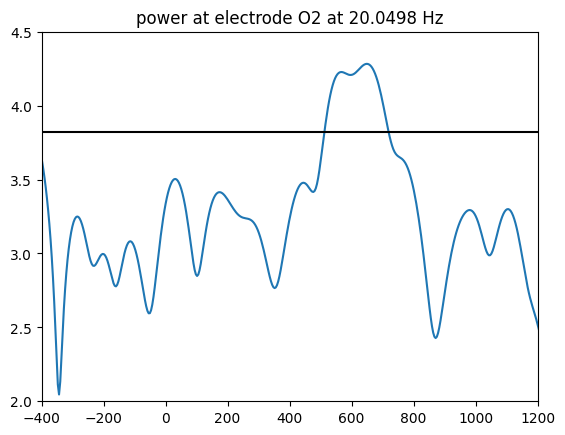

In [ ]:
# Load data
EEG = loadmat('../data/sampleEEGdata.mat')['EEG'][0, 0]

# Define parameters for figure 17.1
num_frex = 6
frex = np.logspace(np.log10(4), np.log10(30), num_frex)
s = 6 / (2 * np.pi * frex)
time = np.arange(-1, 1 + 1/EEG['srate'][0][0], 1/EEG['srate'][0][0])

# Initialize wavelets
mwaves = np.zeros((num_frex, len(time)), dtype=complex)
swaves = np.zeros((num_frex, len(time)), dtype=complex)

# Create Morlet wavelets and s-transforms
for fi in range(num_frex):
    mwaves[fi, :] = np.exp(2 * 1j * np.pi * frex[fi] * time) * np.exp(-time**2 / (2 * (s[fi]**2)))
    swaves[fi, :] = np.exp(2 * 1j * np.pi * frex[fi] * time) * np.exp(-time**2 * frex[fi]**2 / 2)

# Additional parameters for convolution
time = np.arange(-1, 1 + 1/EEG['srate'][0][0], 1/EEG['srate'][0][0])
n_wavelet = len(time)
n_data = EEG['pnts'][0][0] * EEG['trials'][0][0]
n_conv = n_wavelet + n_data - 1
half_wave = (len(time) - 1) // 2

# FFT of EEG data
eegfft = fft(EEG['data'][63, :, :].flatten('F'), n_conv)

# Convolution
eegconv = ifft(fft(mwaves[4, :], n_conv) * eegfft)
eegconv = eegconv[half_wave:-half_wave]

# Reshape to time X trials and compute power
eegpower = np.log10(np.abs(np.reshape(eegconv, (EEG['pnts'][0][0], EEG['trials'][0][0]), 'F')**2))

# Plotting the results for figure 17.1
plt.figure()
plt.plot(EEG['times'][0], eegpower[:, 49])
plt.xlim([-400, 1200])
plt.ylim([2, 4.5])
threshold = np.percentile(eegpower.flatten('F'), 95)
plt.axhline(y=threshold, color='k')
plt.title(f"power at electrode {EEG['chanlocs'][0][63]['labels'][0]} at {frex[4]:.4f} Hz")
plt.show()

### Figure 17.2

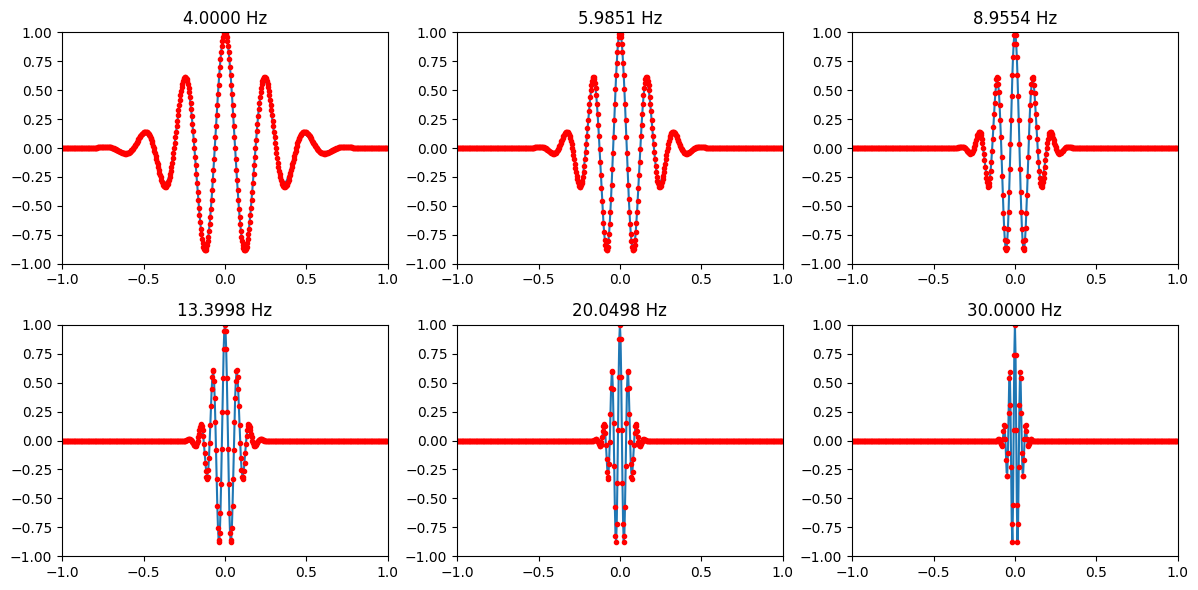

In [ ]:
plt.figure(figsize=(12, 6))
for i in range(num_frex):
    plt.subplot(2, 3, i+1)
    plt.plot(time, np.real(mwaves[i, :]))
    plt.plot(time, np.real(swaves[i, :]), 'r.')
    plt.xlim([-1, 1])
    plt.ylim([-1, 1])
    plt.title(f"{frex[i]:.4f} Hz")
plt.tight_layout()
plt.show()